### Ch 2: Independent Mechanisms

As we previously discussed, we can't always do interventions so how do we find causality from observational data?

One solution it to check which mechanism is invariant across different environments!

**Takeaway**: If A -> T is causal, then P(T|A) should be the same everywhere as the core physics does not really change from place to place.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

np.random.seed(42)

### Generate altitude-temperature data (again)

In [3]:
def generate_cities_data(country='austria', n = 200):
    if country == 'austria':
        altitude = np.random.gamma(2, 220, n)      
    else: 
        altitude = np.random.gamma(3, 270, n)      
    
    temperature = 15 - 0.0065 * altitude + np.random.normal(0, 1, n)
    return altitude, temperature

# Generate data
A_austria, T_austria = generate_cities_data('austria', 200)
A_japan, T_japan = generate_cities_data('japan', 200)

print("Average altitude:")
print(f"Austria: {A_austria.mean():.0f} metres")
print(f"Japan:   {A_japan.mean():.0f} metres")

print("\nDifferent countries have cities at different altitudes")

Average altitude:
Austria: 437 metres
Japan:   827 metres

Different countries have cities at different altitudes


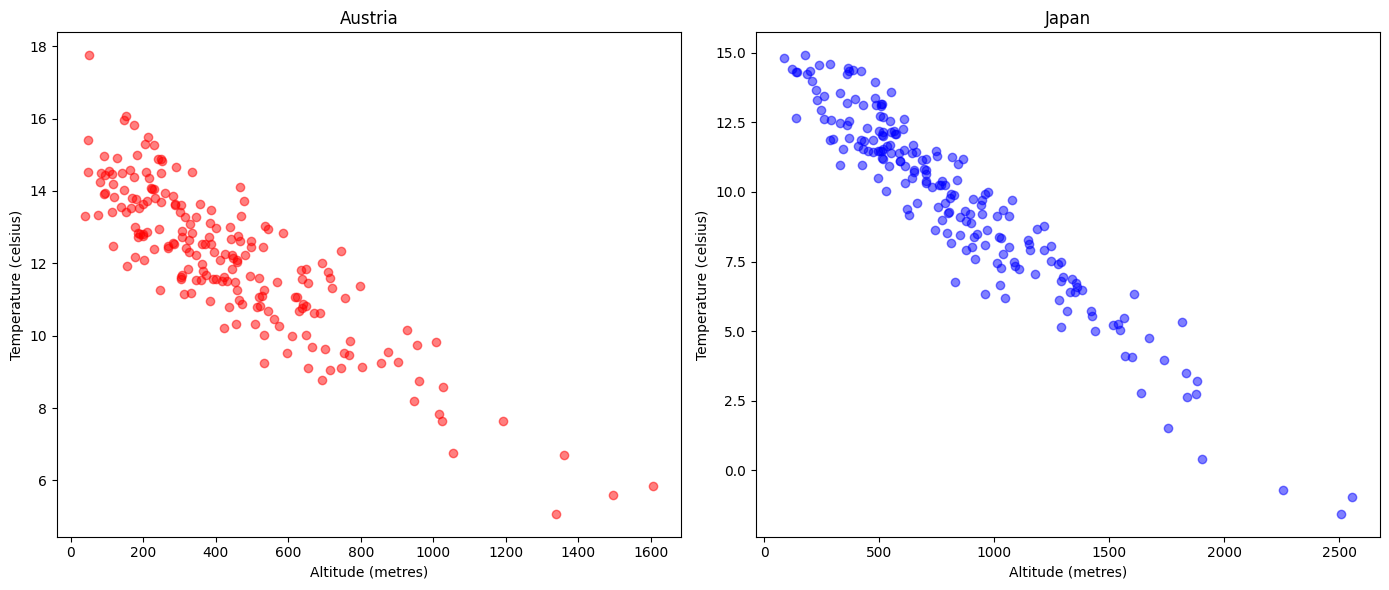

Both countries follow a similar downward trend!
But is the mechanism P(T|A) exactly the same?


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Austria
ax1.scatter(A_austria, T_austria, alpha=0.5, color='red')
ax1.set_xlabel('Altitude (metres)')
ax1.set_ylabel('Temperature (celsius)')
ax1.set_title('Austria')

# Japan
ax2.scatter(A_japan, T_japan, alpha=0.5, color='blue')
ax2.set_xlabel('Altitude (metres)')
ax2.set_ylabel('Temperature (celsius)')
ax2.set_title('Japan')

plt.tight_layout()
plt.show()

print("Both countries follow a similar downward trend!")
print("But is the mechanism P(T|A) exactly the same?")

In [5]:
# Create dataframes
df_austria = pd.DataFrame({'A': A_austria, 'T': T_austria})
df_japan = pd.DataFrame({'A': A_japan, 'T': T_japan})

print("Test for if P(T|A) is the causal direction")
print("------")
model_austria_TA = smf.ols('T ~ 1 + A', data =df_austria).fit()
model_japan_TA = smf.ols('T ~ 1 + A', data=df_japan).fit()

slope_aus = model_austria_TA.params['A']
slope_jap = model_japan_TA.params['A']

print(f"Austria: {slope_aus:.6f}")
print(f"Japan:   {slope_jap:.6f}")
print(f"Difference: {abs(slope_aus - slope_jap):.6f} (tiny diff!)")
print("Mechanism P(T|A) is invariant\n")

print("Test for if P(A|T) is the wrong direction")
print("------")
model_aus_AT = smf.ols('A ~ 1 + T', data=df_austria).fit()
model_jap_AT = smf.ols('A ~ 1 + T', data=df_japan).fit()

slope_austria_w = model_aus_AT.params['T']
slope_japan_w = model_jap_AT.params['T']

print(f"Austria: {slope_austria_w:.2f}")
print(f"Japan:   {slope_japan_w:.2f}")
print(f"Difference: {abs(slope_austria_w - slope_japan_w):.2f} (pretty large!)")
print(" Mechanism P(A|T) is not invariant")

Test for if P(T|A) is the causal direction
------
Austria: -0.006348
Japan:   -0.006644
Difference: 0.000296 (tiny diff!)
Mechanism P(T|A) is invariant

Test for if P(A|T) is the wrong direction
------
Austria: -119.44
Japan:   -137.34
Difference: 17.91 (pretty large!)
 Mechanism P(A|T) is not invariant


### Summary

- P(T|A) is the same in Austria and Japan -> invariant mechanism -> A causes T
- P(A|T) differs between countries -> not invariant -> T doesn't cause A 

**Why this works:** 
- Physics (lapse rate) is the same everywhere
- Where cities are built depends on history, culture, geography

**Main takeaway:** Causal mechanisms are invariant across environments. This fact helps us discover causality from observational data!